In [75]:
import pandas as pd
import nltk
import json
import matplotlib as plt
import seaborn as sns

In [34]:
df_88 = pd.read_csv('../../Test-Data/pre-final-88-genre.csv')
df_88.head(1)

,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,energy,...,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre
0,0,BIBI Vengeance,Lowlife Princess: Noir,BIBI,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,0.748,...,0.0895,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '..."


In [35]:
new_df88 = pd.DataFrame({'artist_name': df_88['artist'], 'lyrics': df_88['filtered_lyrics']})
new_df88.head(1)

,artist_name,lyrics
0,BIBI,Watch me danceWatch me sing Watch me danceWat...


In [120]:
# Remove "missing" songs
new_df88 = new_df88.loc[new_df88['lyrics'] != 'missing']
len(new_df88.loc[new_df88['lyrics'] == 'missing'])

0

In [86]:
# Add space in between words and lowercase
def correct_format(lyric_str):
    lyric_str = lyric_str.lower()
    new_str = ""
    for index in range(0, len(lyric_str)):
        if index+1 == len(lyric_str):
            new_str = new_str + lyric_str[index]
            break
        else:
            prev = lyric_str[index]
            after = lyric_str[index+1]
            if prev.islower() and after.isupper():
                new_str = new_str + prev + " "
            else:
                new_str = new_str + prev
    return new_str

In [87]:
new_df88['lyrics'] = new_df88['lyrics'].apply(lambda x: correct_format(x))

In [88]:
# Tokenize lyrics
new_df88['lyrics_tokenized']=new_df88['lyrics'].apply(lambda x: x.split())
new_df88


,artist_name,lyrics,lyrics_tokenized
0,BIBI,watch me dance watch me sing watch me dance w...,"[watch, me, dance, watch, me, sing, watch, me,..."
1,BIBI,dice and ice cube home girls bitches spin it ...,"[dice, and, ice, cube, home, girls, bitches, s..."
2,BIBI,champagne it might be pretty it might be beau...,"[champagne, it, might, be, pretty, it, might, ..."
3,BIBI,bad sad and mad refrain you blued my bruise p...,"[bad, sad, and, mad, refrain, you, blued, my, ..."
4,BIBI,missing,[missing]
...,...,...,...
453,Warren Hue,warren hue i wanna be like i ve been stuck i...,"[warren, hue, i, wanna, be, like, i, ve, been,..."
454,Warren Hue,missing,[missing]
455,Warren Hue,uh uh ayy ya ya uh uh turn turn ya ya t turn y...,"[uh, uh, ayy, ya, ya, uh, uh, turn, turn, ya, ..."
456,Warren Hue,won t you run away with me this evening oh tru...,"[won, t, you, run, away, with, me, this, eveni..."


In [114]:
df_88['artist'].unique()

array(['BIBI', 'CHUNG HA', 'Keith Ape', 'Dumbfoundead', 'Guapdad 4000',
       'Rich Brian', 'Higher Brothers', 'Jackson Wang', 'Joji',
       'Lexie Liu', 'Mili', 'Seori', 'Stephanie Poetri', 'Warren Hue'],
      dtype=object)

In [106]:
# Find the frequency of words for Rich Brian and Joji
richbrian_lyrics = new_df88.loc[new_df88['artist_name'] == 'Rich Brian']
joji_lyrics = new_df88.loc[new_df88['artist_name'] == 'Joji']

In [107]:
# Function to combine all words into one list
def comb_words(df):
    word_list = []
    for rows in df:
        word_list.extend(rows)
    return word_list

In [108]:
rb_all_words = comb_words(richbrian_lyrics['lyrics_tokenized'])
joji_all_words = comb_words(joji_lyrics['lyrics_tokenized'])

In [109]:
rb_word_dist = nltk.FreqDist(rb_all_words) 
rb_words_df = pd.DataFrame({'word':list(rb_word_dist.keys()), 'count':list(rb_word_dist.values())}).sort_values(by='count', ascending=False)
joji_word_dist = nltk.FreqDist(joji_all_words) 
joji_words_df = pd.DataFrame({'word':list(joji_word_dist.keys()), 'count':list(joji_word_dist.values())}).sort_values(by='count', ascending=False) 

In [95]:
rb_words_df

,word,count
9,i,663
56,the,307
14,my,258
31,you,237
12,it,220
...,...,...
1040,attention,1
1041,bullshit,1
1042,captions,1
1044,outlive,1


In [96]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
new_rb_words_df = rb_words_df.loc[rb_words_df['word'].isin(stop) == False]
new_joji_words_df = joji_words_df.loc[joji_words_df['word'].isin(stop)==False]

<AxesSubplot:xlabel='count', ylabel='word'>

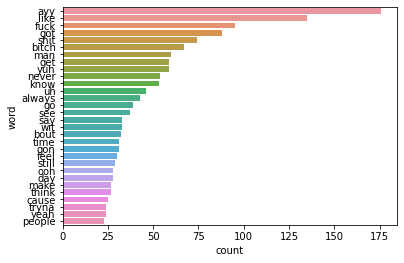

In [99]:
# Visualize the words
# Rich Brian
sns.barplot(data=new_rb_words_df[0:30], x= "count", y = "word") 

<AxesSubplot:xlabel='count', ylabel='word'>

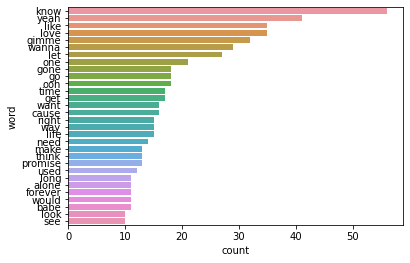

In [100]:
# Joji
sns.barplot(data=new_joji_words_df[0:30], x= "count", y = "word") 

# Lyric Similarity Model using Natural Language Processing and One Hot Encoder

In [115]:
# Analyze similarity between lyrics generated and artists actual song lyrics
from sklearn.model_selection import train_test_split
from tensorflow import keras 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import keras_tuner as kt
import sklearn as skl

In [121]:
# Preprocess the data
X = new_df88['lyrics_tokenized'].values
y = new_df88['artist_name'].values
print(X[0:2], y[0:2])

[list(['watch', 'me', 'dance', 'watch', 'me', 'sing', 'watch', 'me', 'dance', 'watch', 'me', 'sing', 'i', 'got', 'mercy', 'i', 'got', 'grace', 'desperado', 'with', 'the', 'scales', 'throw', 'a', 'rose', 'on', 'your', 'body', 'mask', 'of', 'zorro', 'i', 'm', 'so', 'wanted', 'look', 'scared'])
 list(['dice', 'and', 'ice', 'cube', 'home', 'girls', 'bitches', 'spin', 'it', 'spin', 'it', 'pussy', 'chips', 'and', 'chips', 'and', 'chips', 'and', 'demon', 'under', 'the', 'table', 'risk', 'it', 'risk', 'it', 'risk', 'it', 'till', 'the', 'last', 'dime', 'yeah', 'yeah', 'yeah', 'risk', 'it', 'risk', 'it', 'risk', 'it', 'till', 'the', 'last', 'b', 'b', 'bitches', 'ice', 'and', 'home', 'girl', 'on', 'you', 'on', 'home', 'girl', 'bitches', 'ice', 'and', 'home', 'girl', 'on', 'you', 'on', 'home', 'girl', 'bitches', 'ice', 'and', 'home', 'girl', 'on', 'you', 'on', 'home', 'girl', 'bitches', 'bitches', 'risk', 'it', 'till', 'the', 'last', 'dime', 'give', 'me', 'that', 'hook', 'that', 'spin', 'that', 'r

In [ ]:
# Start a SparkSession
import findspark
findspark.init()

In [125]:
# One-hot encode the target variable
X_one_hot = pd.get_dummies(X)
y_one_hot = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, random_state=78)

TypeError: unhashable type: 'list'

In [124]:
# Use neural networks to make artist prediction model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=1))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn_model.fit(X_train, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).